<a href="https://colab.research.google.com/github/AmeerHamza-345/Q2/blob/main/Assignment_03_Utilizing_Gemini_API_for_Image_Prompts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --quiet google-generativeai # installation of requird libary as google-generativeai

In [2]:

from google.colab import userdata
GOOGLE_API_KEY: str = userdata.get('GOOGLE_API_KEY')

if GOOGLE_API_KEY:
  print("API key fetched successfully!")
else:
  print("API key not found. Please set the 'GEMINI_API_KEY' user data.")

API key fetched successfully!


In [3]:
import google.generativeai as genai
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
# check all available methods in the genai module
dir(genai)

['ChatSession',
 'GenerationConfig',
 'GenerativeModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'annotations',
 'caching',
 'configure',
 'create_tuned_model',
 'delete_file',
 'delete_tuned_model',
 'embed_content',
 'embed_content_async',
 'get_base_model',
 'get_file',
 'get_model',
 'get_operation',
 'get_tuned_model',
 'list_files',
 'list_models',
 'list_operations',
 'list_tuned_models',
 'protos',
 'responder',
 'string_utils',
 'types',
 'update_tuned_model',
 'upload_file',
 'utils']

In [49]:
# get all available models from gemini
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [56]:
from google.generativeai.generative_models import GenerativeModel
model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [50]:
model_2: GenerativeModel = genai.GenerativeModel("gemini-2.0-flash-thinking-exp")

In [9]:
from IPython.display import display

In [11]:
from IPython.display import Markdown

In [51]:
# prompt: load inage file from locally C:\Users\SNE\Downloads

# The provided path is for a local file system.  Colab operates within its own file system.
# You need to upload the image file into the Colab environment first.

from google.colab import files

uploaded = files.upload()

#  download first and upload the image for this link  https://github.com/AmeerHamza-345/Q2/blob/main/car%20_text_features.jpg

# Assuming the uploaded file is named 'image.jpg'
# Adjust the filename if necessary.
image_filename = list(uploaded.keys())[0]

# Now you can work with image_filename in Colab
print(f"Uploaded image filename: {image_filename}")


# Example using the image file (replace with your actual image processing code):
from PIL import Image
img = Image.open(image_filename)
display(img)

IndexError: list index out of range

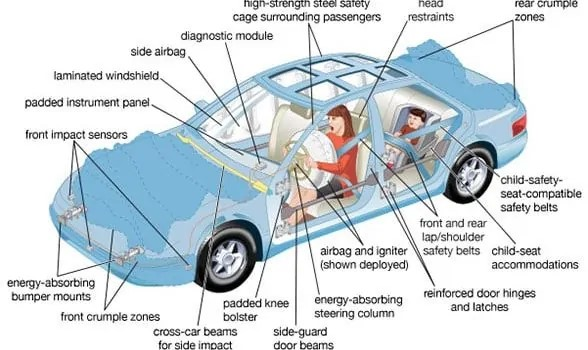

In [52]:
from PIL import Image
img = Image.open(image_filename)
display(img)

In [54]:
# Write a prompt and store it in some variable
prompt = """This image contains a sketch of a potential product along with some notes.
 Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

In [64]:
response_1: GenerateContentResponse = model.generate_content([prompt, img]) # respons of model (gemini 1.5 flash)


In [65]:
response_2: GenerateContentResponse = model_2.generate_content([prompt, img])# respons of model (gemini-2.0-flash-thinking-exp)

In [66]:
print(response_1.text)

```json
{
  "description": "This is a sketch of a car designed with numerous safety features to protect passengers in the event of a collision. The design emphasizes a strong, protective passenger cage, impact absorption in various areas, and child safety.",
  "features": [
    "High-strength steel safety cage surrounding passengers",
    "Diagnostic module",
    "Side airbag",
    "Laminated windshield",
    "Padded instrument panel",
    "Front impact sensors",
    "Head restraints",
    "Rear crumple zones",
    "Front and rear lap/shoulder safety belts",
    "Child-safety-seat-compatible safety belts",
    "Child-seat accommodations",
    "Airbag and igniter (shown deployed)",
    "Energy-absorbing bumper mounts",
    "Front crumple zones",
    "Cross-car beams for side impact",
    "Padded knee bolster",
    "Energy-absorbing steering column",
    "Reinforced door hinges and latches",
    "Side-guard door beams"
  ]
}
```


In [68]:
print(response_2)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The user wants me to describe a product based on a sketch and notes provided in an image. The product appears to be a car chassis showcasing its safety features. I need to list all the features pointed out in the image and provide an overall description of the product. The output should be in JSON format as specified.\n\n**Plan:**\n1. Extract all the labeled features from the image.\n2. Write a descriptive paragraph summarizing the product and its purpose based on the features.\n3. Format the extracted features into a list.\n4. Construct the JSON output with the description and the list of features."
              },
              {
                "text": "```json\n{\n  \"description\": \"The product depicted is a cutaway view of a car's body and interior, 

In [69]:
print(response_2.text)

The user wants me to describe a product based on a sketch and notes provided in an image. The product appears to be a car chassis showcasing its safety features. I need to list all the features pointed out in the image and provide an overall description of the product. The output should be in JSON format as specified.

**Plan:**
1. Extract all the labeled features from the image.
2. Write a descriptive paragraph summarizing the product and its purpose based on the features.
3. Format the extracted features into a list.
4. Construct the JSON output with the description and the list of features.
```json
{
  "description": "The product depicted is a cutaway view of a car's body and interior, specifically highlighting its comprehensive safety features. It showcases various design elements and technologies aimed at protecting occupants during a collision. The illustration emphasizes structural integrity, energy absorption, and restraint systems, demonstrating a multi-layered approach to pas

In [71]:
# Import the Markdown class from the IPython.display module
# This is used to render Markdown content in the notebook output
from IPython.display import Markdown

In [72]:
display(Markdown(response_2.text))

The user wants me to describe a product based on a sketch and notes provided in an image. The product appears to be a car chassis showcasing its safety features. I need to list all the features pointed out in the image and provide an overall description of the product. The output should be in JSON format as specified.

**Plan:**
1. Extract all the labeled features from the image.
2. Write a descriptive paragraph summarizing the product and its purpose based on the features.
3. Format the extracted features into a list.
4. Construct the JSON output with the description and the list of features.
```json
{
  "description": "The product depicted is a cutaway view of a car's body and interior, specifically highlighting its comprehensive safety features. It showcases various design elements and technologies aimed at protecting occupants during a collision. The illustration emphasizes structural integrity, energy absorption, and restraint systems, demonstrating a multi-layered approach to passenger safety.",
  "features": [
    "high-strength steel safety cage surrounding passengers",
    "head restraints",
    "rear crumple zones",
    "child-safety-seat-compatible safety belts",
    "child-seat accommodations",
    "reinforced door hinges and latches",
    "front and rear lap/shoulder safety belts",
    "airbag and igniter (shown deployed)",
    "energy-absorbing steering column",
    "side-guard door beams",
    "padded knee bolster",
    "cross-car beams for side impact",
    "energy-absorbing bumper mounts",
    "front crumple zones",
    "front impact sensors",
    "padded instrument panel",
    "laminated windshield",
    "side airbag",
    "diagnostic module"
  ]
}
```